<a href="https://colab.research.google.com/github/prabindh/covid2020-predictor/blob/master/Prediction_Covid_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Exercise

Predict the number of cases n-days after from the 1st reported infection.

Use the data available in the below file, provided by JHU CSSE.

https://github.com/prabindh/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [1]:
#import cudf as pd
import pandas as pd

from urllib.request import urlopen
#numbers_csv = urlopen("https://raw.githubusercontent.com/prabindh/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_csv = urlopen("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_df = pd.read_csv(numbers_csv)
numbers_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240,43403
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615


Lets find the details of this dataset.


In [2]:
numbers_df["Country/Region"].describe()

count       269
unique      191
top       China
freq         33
Name: Country/Region, dtype: object

Treating the various provinces, countries as independent features, get only the numeric count for all rows.

In [3]:
count_df = numbers_df.iloc[:, 4:]
count_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240,43403
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615


In [4]:
count_df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02,2.690000e+02
mean,2.063197,2.431227,3.498141,5.330855,7.873606,10.881041,20.736059,22.925651,30.613383,36.903346,44.750929,62.405204,73.929368,88.840149,102.762082,114.509294,127.866171,138.029740,149.293680,158.992565,166.583643,168.137546,224.468401,248.732342,256.695167,264.814126,272.379182,279.375465,281.234201,283.315985,285.654275,292.200743,293.613383,295.710037,298.881041,302.513011,307.568773,312.717472,319.754647,328.613383,...,1.356764e+05,1.370135e+05,1.382417e+05,1.392445e+05,1.404531e+05,1.416762e+05,1.430890e+05,1.446031e+05,1.461289e+05,1.473974e+05,1.484604e+05,1.501261e+05,1.515705e+05,1.532197e+05,1.549656e+05,1.568123e+05,1.583470e+05,1.596611e+05,1.616576e+05,1.634007e+05,1.652927e+05,1.673402e+05,1.694563e+05,1.712271e+05,1.728410e+05,1.747252e+05,1.766343e+05,1.788559e+05,1.810612e+05,1.834447e+05,1.853465e+05,1.874462e+05,1.893063e+05,1.913826e+05,1.937792e+05,1.961838e+05,1.985943e+05,2.008018e+05,2.025500e+05,2.045143e+05
std,27.126977,27.225426,33.893779,47.172103,65.922436,88.820005,217.968660,219.300487,302.209425,358.296610,440.904008,685.200365,828.315594,1020.864037,1203.014263,1352.349533,1525.572461,1656.546846,1810.754881,1938.534841,2038.381084,2038.720580,2941.528462,3319.080126,3431.402037,3549.182413,3659.269830,3762.412520,3783.703016,3808.726855,3822.201835,3908.796229,3908.835114,3921.275858,3951.719877,3976.340952,4001.825457,4022.183635,4049.880701,4086.880940,...,7.072801e+05,7.131747e+05,7.189164e+05,7.236663e+05,7.279320e+05,7.329083e+05,7.387374e+05,7.447246e+05,7.508722e+05,7.562407e+05,7.604742e+05,7.661547e+05,7.715535e+05,7.772043e+05,7.832688e+05,7.898203e+05,7.959760e+05,8.007423e+05,8.061722e+05,8.121088e+05,8.183795e+05,8.251442e+05,8.321507e+05,8.384760e+05,8.440711e+05,8.498790e+05,8.574585e+05,8.648618e+05,8.726170e+05,8.814451e+05,8.893403e+05,8.969698e+05,9.043024e+05,9.128595e+05,9.225275e+05,9.324701e+05,9.429445e+05,9.530068e+05,9.606809e+05,9.694153e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

Get the country with maximum numbers the last day of record.


In [5]:
max_count = count_df.iloc[:, -1].max()
max_count

11195388

In [6]:
max_index = count_df['4/2/20'].idxmax()
max_index

244

In [7]:
numbers_df.iloc[max_index]

Province/State         NaN
Country/Region          US
Lat                     40
Long                  -100
1/22/20                  1
                    ...   
11/12/20          10560111
11/13/20          10737335
11/14/20          10903890
11/15/20          11036935
11/16/20          11195388
Name: 244, Length: 304, dtype: object

In [8]:
usa_data = numbers_df[numbers_df["Country/Region"] == "US"]
usa_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
244,NaN,US,40.0,-100.0,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,...,7587118,7643344,7697504,7743396,7783958,7836979,7895909,7960130,8028392,8085465,8134804,8201387,8262326,8324960,8397618,8480161,8564037,8625984,8691979,8767572,8845830,8936033,9033829,9122666,9199122,9281002,9404058,9507004,9632704,9757612,9886080,9995860,10115804,10256094,10399325,10560111,10737335,10903890,11036935,11195388


In [9]:
china_data = numbers_df[numbers_df["Country/Region"] == "China"]
china_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
56,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,992,992,992,992,992,992,992
57,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,936,936,936,937,937,937,937,937,937,937,937,938,938,938,938,940,940,940,941,941,942,942,942,942,942,944,944,945,945,945,945,945,947,947,947,947,947,947,947,947
58,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,585,585,585,585,585,585,585,586,586,586,586,587,587,587,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589
59,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,414,414,415,416,416,416,416,417,417,417,417,418,419,420,427,429,429,430,431,431,432,436,436,437,437,441,443,444,446,455,456,456,459,459,460,460,461,461,461,461
60,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,177,180,180,180,180,180,180,180,180,180,180,180,181,181,181,181,181
61,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,1851,1852,1858,1861,1863,1869,1873,1875,1877,1881,1884,1889,1892,1895,1895,1904,1907,1908,1909,1911,1914,1916,1919,1922,1927,1935,1938,1938,1941,1943,1945,1949,1955,1955,1956,1956,1963,1966,1968,1971
62,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260
63,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
64,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
65,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,365,365,365,367,367,367,368,368,368,368,368,368,368,368,368,368,368,369,371,372,372,372,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373


How does India fare ?

In [10]:
india_data = numbers_df[numbers_df["Country/Region"] == "India"]
india_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
143,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,6906151,6979423,7053806,7120538,7175880,7239389,7307097,7370468,7432680,7494551,7550273,7597063,7651107,7706946,7761312,7814682,7864811,7909959,7946429,7990322,8040203,8088851,8137119,8184082,8229313,8267623,8313876,8364086,8411724,8462080,8507754,8553657,8591730,8636011,8683916,8728795,8773479,8814579,8845127,8873541


## Visualisation of the rates

In [11]:
# Take only the numerical values
counts = india_data.iloc[0:1, range(4, len(india_data.columns))]

startCol = 0
for columnName in counts:
  if counts[columnName].values > 0:
    break
  startCol = startCol + 1
counts = counts.iloc[0:1, range(startCol, len(counts.columns))]

counts

,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
143,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,5,28,30,31,34,39,43,...,6906151,6979423,7053806,7120538,7175880,7239389,7307097,7370468,7432680,7494551,7550273,7597063,7651107,7706946,7761312,7814682,7864811,7909959,7946429,7990322,8040203,8088851,8137119,8184082,8229313,8267623,8313876,8364086,8411724,8462080,8507754,8553657,8591730,8636011,8683916,8728795,8773479,8814579,8845127,8873541


## Converting to np array

In [12]:
counts_np = counts.to_numpy()

In [13]:
counts_np.shape

(1, 292)

In [14]:
import numpy as np
counts_np = np.squeeze(counts_np)

In [15]:
import numpy as np
counts_np

array([      1,       1,       1,       2,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       5,       5,      28,
            30,      31,      34,      39,      43,      56,      62,
            73,      82,     102,     113,     119,     142,     156,
           194,     244,     330,     396,     499,     536,     657,
           727,     887,     987,    1024,    1251,    1397,    1998,
          2543,    2567,    3082,    3588,    4778,    5311,    5916,
          6725,    7598,    8446,    9205,   10453,   11487,   12322,
         13430,   14352,   15722,   17615,   18539,   20080,   21370,
         23077,   24530,   26283,   27890,   29451,   31324,   33062,
         34863,   37257,   39699,   42505,   46437,   49400,   52987,
         56351,   59

## Visualisation of the data

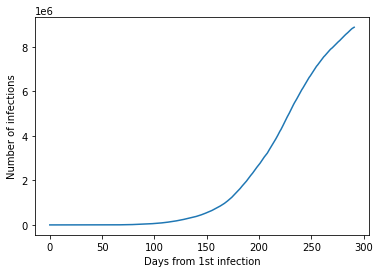

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,counts_np.shape[0])),counts_np)
plt.xlabel("Days from 1st infection") 
plt.ylabel("Number of infections") 
plt.show()


## Formulate the data-set


In [17]:
x_days = np.array(list(range(0, len(counts_np))))
x_days

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
y_infections_india = counts_np
y_infections_india

array([      1,       1,       1,       2,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       5,       5,      28,
            30,      31,      34,      39,      43,      56,      62,
            73,      82,     102,     113,     119,     142,     156,
           194,     244,     330,     396,     499,     536,     657,
           727,     887,     987,    1024,    1251,    1397,    1998,
          2543,    2567,    3082,    3588,    4778,    5311,    5916,
          6725,    7598,    8446,    9205,   10453,   11487,   12322,
         13430,   14352,   15722,   17615,   18539,   20080,   21370,
         23077,   24530,   26283,   27890,   29451,   31324,   33062,
         34863,   37257,   39699,   42505,   46437,   49400,   52987,
         56351,   59

## Obtaining data for any country

Note the changes, to add up all provinces/regions within a country, if found. For example, there are more than one regions in China.

In [19]:
def get_covidian_count(country_name):
  country_data = numbers_df[numbers_df["Country/Region"] == country_name]
  rows = country_data.shape[0]
  counts = country_data.iloc[0:rows, range(4, len(country_data.columns))]
  counts = counts.sum()
  startCol = 0
  for column in counts:
    if column > 0:
      break
    startCol = startCol + 1
  counts = counts.iloc[range(startCol, len(counts))]
  np_arr = np.squeeze(counts.to_numpy())
  x_days = np.array(list(range(0, len(np_arr))))
  return np.array([x_days, np_arr])



In [20]:
infections_usa = get_covidian_count("US")
infections_india = get_covidian_count("India")
infections_china = get_covidian_count("China")
infections_india

array([[      0,       1,       2,       3,       4,       5,       6,
              7,       8,       9,      10,      11,      12,      13,
             14,      15,      16,      17,      18,      19,      20,
             21,      22,      23,      24,      25,      26,      27,
             28,      29,      30,      31,      32,      33,      34,
             35,      36,      37,      38,      39,      40,      41,
             42,      43,      44,      45,      46,      47,      48,
             49,      50,      51,      52,      53,      54,      55,
             56,      57,      58,      59,      60,      61,      62,
             63,      64,      65,      66,      67,      68,      69,
             70,      71,      72,      73,      74,      75,      76,
             77,      78,      79,      80,      81,      82,      83,
             84,      85,      86,      87,      88,      89,      90,
             91,      92,      93,      94,      95,      96,      97,
      

In [21]:
np.savetxt("usa.csv",  np.transpose([infections_usa[0],infections_usa[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("india.csv",  np.transpose([infections_india[0],infections_india[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("china.csv",  np.transpose([infections_china[0],infections_china[1]]), fmt="%d,%d", header="Days, Count")

To confirm the data is proper, load the data back and check.

In [22]:
test_np = np.loadtxt("usa.csv", delimiter=',', skiprows=1, dtype='int,int')
test_np

array([(  0,        1), (  1,        1), (  2,        2), (  3,        2),
       (  4,        5), (  5,        5), (  6,        5), (  7,        6),
       (  8,        6), (  9,        8), ( 10,        8), ( 11,        8),
       ( 12,       11), ( 13,       11), ( 14,       11), ( 15,       12),
       ( 16,       12), ( 17,       12), ( 18,       12), ( 19,       12),
       ( 20,       13), ( 21,       13), ( 22,       14), ( 23,       14),
       ( 24,       14), ( 25,       14), ( 26,       14), ( 27,       14),
       ( 28,       14), ( 29,       14), ( 30,       16), ( 31,       16),
       ( 32,       16), ( 33,       16), ( 34,       16), ( 35,       16),
       ( 36,       17), ( 37,       17), ( 38,       25), ( 39,       32),
       ( 40,       55), ( 41,       74), ( 42,      107), ( 43,      184),
       ( 44,      237), ( 45,      403), ( 46,      519), ( 47,      594),
       ( 48,      782), ( 49,     1147), ( 50,     1586), ( 51,     2219),
       ( 52,     2978), (

## Given x, predict y

#### Kaggle
Note - this notebook is also available as a Kaggle kernel, at
https://www.kaggle.com/prabindh/kernel5f31471257

#### References
1. https://pypi.org/project/fbprophet

2. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
